In [1]:
# Tensorflow 2.0
# PyTorch

### Instruction
1. File->Save a copy in Drive
2. Rename: replace reg_no with your registration no.
3. Put your name

### Task
1. Try changing number of neurons
2. Try chaning number of hidden layers
3. Try changing learning rates
4. Try ... any other things to improve accuracy.

### Name: Eftakhar Ahmed Arnob
### Maximum testing accuracy achieved: 0.5228

### FC on CIFAR 10 Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [ ]:
# x_train[0]

### subtract mean

In [ ]:
#todo

In [9]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [10]:

x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

In [ ]:
# x_train[0]

In [11]:
ri=np.random.randint(x_train.shape[0])
print('ri=', ri)

ri= 11082


In [12]:
ri=5
x=x_train[ri]

In [13]:
y_train[ri]

array([1], dtype=uint8)

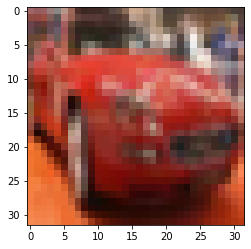

In [14]:

plt.imshow(x)

In [15]:
32*32*3

3072

In [16]:
3072*200+200

614600

In [42]:
model = tf.keras.Sequential()
model.add( Flatten(input_shape=(32, 32, 3) ) )
model.add( Dense(500, activation='relu' ) ) 
model.add( Dense(200, activation='relu' ) ) 
model.add( Dense(150, activation='relu' ) ) 
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 500)               1536500   
                                                                 
 dense_17 (Dense)            (None, 200)               100200    
                                                                 
 dense_18 (Dense)            (None, 150)               30150     
                                                                 
 dense_19 (Dense)            (None, 10)                1510      
                                                                 
Total params: 1,668,360
Trainable params: 1,668,360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#search google to set learning rate.

In [44]:
model.compile(loss="sparse_categorical_crossentropy",  optimizer="Adam", metrics=['accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [45]:
# hist=model.fit(x_train, y_train, epochs=50)
hist = model.fit(x_train, y_train, validation_split= 0.20, epochs=60)

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8631 - accuracy: 0.3301 - val_loss: 1.7860 - val_accuracy: 0.3622
Epoch 2/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6777 - accuracy: 0.4015 - val_loss: 1.6688 - val_accuracy: 0.4174
Epoch 3/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5913 - accuracy: 0.4360 - val_loss: 1.6027 - val_accuracy: 0.4315
Epoch 4/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5320 - accuracy: 0.4570 - val_loss: 1.5624 - val_accuracy: 0.4485
Epoch 5/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4900 - accuracy: 0.4711 - val_loss: 1.5262 - val_accuracy: 0.4564
Epoch 6/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4481 - accuracy: 0.4867 - val_loss: 1.5016 - val_accuracy: 0.4654
Epoch 7/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4127 - accuracy: 0.4976 - val_loss: 1.4799 - val_accuracy:

In [46]:
print('shape:', x_train.shape, y_train.shape)

shape: (50000, 32, 32, 3) (50000, 1)


In [47]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


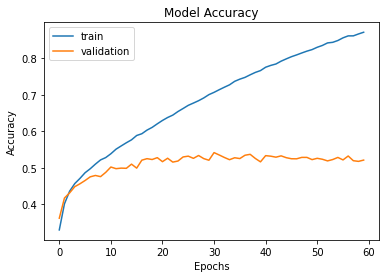

In [48]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','validation'],loc='upper left')
plt.show()

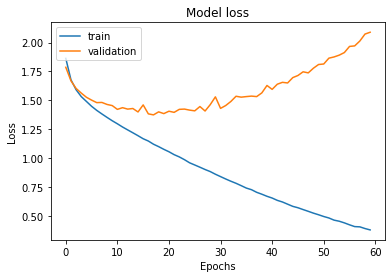

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [50]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 2.0478 - accuracy: 0.5228
Test accuracy: 0.5228000283241272


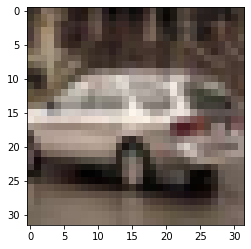

In [51]:
# xt=x_test[10]
xt=x_test[3341]
plt.imshow(xt)

In [52]:
p=model.predict(xt.reshape(-1, 32,32,3))
print(p)

[[6.5675376e-05 9.9546933e-01 6.3696812e-04 2.6868378e-05 1.7205719e-05
  8.9695750e-06 2.8734165e-05 6.1859452e-04 2.7430549e-03 3.8467415e-04]]


In [53]:
yhat=np.argmax(p)
yhat

1

In [54]:
print('predicted:', class_names[yhat])

predicted: automobile


In [55]:
z=[0.7 ,1.2]

In [56]:
import numpy as np

In [57]:
yh1=np.exp(z[0])/ (np.exp(z[0])+np.exp(z[1]))
yh1

0.37754066879814546

In [58]:
yh2=np.exp(z[1])/ (np.exp(z[0])+np.exp(z[1]))
yh2

0.6224593312018545